# Facial Recognition: using Clustering and Principal Component Analysis

This assignment uses faces as a way to exercise skills in clustering and PCA.
* I discussed clustering and PCA in lecture, but please reach out if you need help getting started.

Execute this cell to import the libraries that I used for the PCA_KMeans notebook.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Execute the cell below to import the Olivetti faces data-set from AT&T.
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

This dataset can be used for classification, but we're going to use it to explore dimensionality reduction and clustering.

In [46]:
# import the face dataset
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

# print a description of the dataset
print(olivetti.DESCR)

# assign the numpy array of face data to a variable 'x'
x = olivetti.data

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

We now have a numpy array `x` which contains all the samples for our face exploration.

Find the number of elements in each dimension of the `x` array.

In [47]:
print(x.shape)

(400, 4096)


How many samples are there?  how many feature variables?  and how many unique faces?

In [48]:
num_samples = x.shape[0]
num_features = x.shape[1]
num_unique_faces = len(np.unique(olivetti.target))

print(f"Number of samples: {num_samples}")
print(f"Number of feature variables: {num_features}")
print(f"Number of unique faces: {num_unique_faces}")

Number of samples: 400
Number of feature variables: 4096
Number of unique faces: 40


Visualize the first face by executing the following:

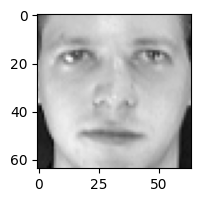

In [49]:
fig = plt.figure(figsize=(2,2))
plt.imshow(x[0].reshape(64,64),
           cmap='gray')

Use PCA to create a new numpy array from `x` that contains the principal component values containing 95% of the variance from the original data.

In [50]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x)
print(x_reduced.shape)

(400, 123)


How many principal components are retained? and by what factor has the size of the data been reduced relative to `x`?

In [51]:
num_components_retained = pca.n_components_
reduction_factor = x.shape[1] / x_reduced.shape[1]

print(f"Number of principal components retained: {num_components_retained}")
print(f"Reduction factor: {reduction_factor:.2f}")

Number of principal components retained: 123
Reduction factor: 33.30


Let's take this reduced array and plot the face information that it still contains.

To transform the dimensionally-reduced data represented in the space of principal components back to the original feature space, you can execute the inverse transform:
* `pca.fit_transform(x)` gets the dimensionally-reduced array in the space of principal components
* `pca.inverse_transform(x_reduced)` transforms the dimensionally-reduced array back into the original feature space (the principal components that have been dropped are treated as having 0 values)

Using this inverse transform, make plots of 5 faces from the data that only retains 95% of the variance and compare them against plots of the same 5 faces made from the original data.

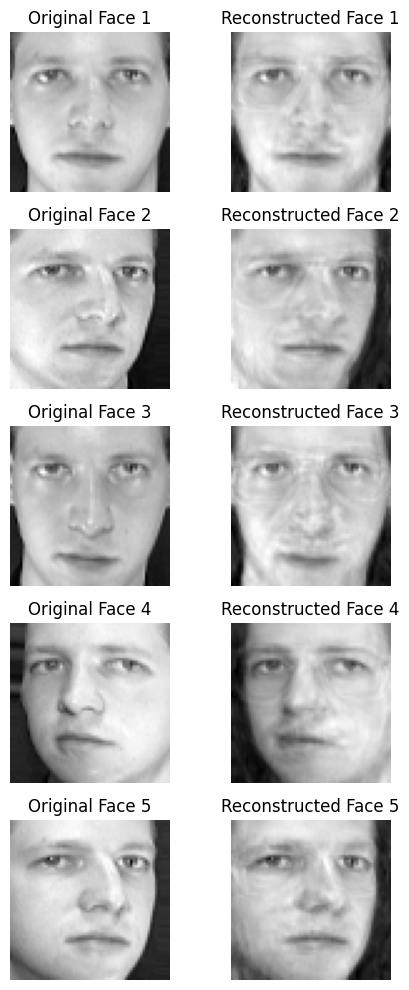

In [52]:
num_faces_to_plot = 5
selected_faces_indices = np.arange(num_faces_to_plot)

original_faces = x[selected_faces_indices]
reconstructed_faces = pca.inverse_transform(x_reduced[selected_faces_indices])

fig, axes = plt.subplots(num_faces_to_plot, 2, figsize=(5, 10))

for i in range(num_faces_to_plot):
    axes[i, 0].imshow(original_faces[i].reshape(64, 64), cmap='gray')
    axes[i, 0].set_title(f"Original Face {i+1}")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(reconstructed_faces[i].reshape(64, 64), cmap='gray')
    axes[i, 1].set_title(f"Reconstructed Face {i+1}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

Do the same process again for 3 different values of retained variance:  50%, 75%, and 99%.  For each,
* print the number of principal components that are kept
* print the factor by which the dimensionality of the array has been reduced
* make plots of the same 5 faces
* comment on which facial features are still noticeable or not noticeable


--- Retained Variance: 50% ---
Number of principal components retained: 4
Reduction factor: 1024.00


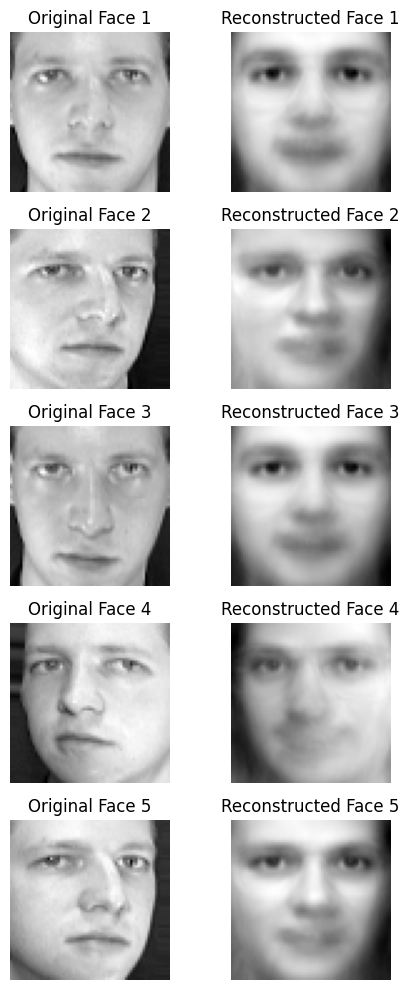

Comment: With 50% variance, many details are lost. Basic facial structure is visible, but features like eyes, nose, and mouth are blurry.

--- Retained Variance: 75% ---
Number of principal components retained: 19
Reduction factor: 215.58


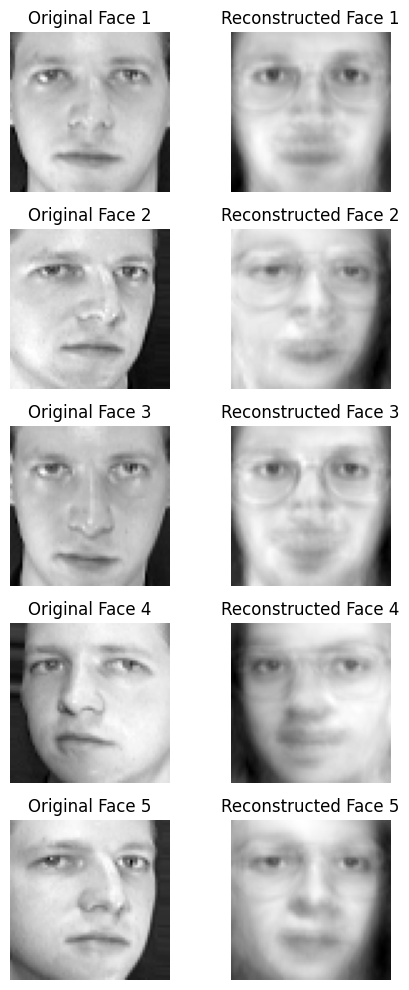

Comment: With 75% variance, facial features are more defined compared to 50%, but still lack sharpness. Some individual characteristics are starting to appear.

--- Retained Variance: 99% ---
Number of principal components retained: 260
Reduction factor: 15.75


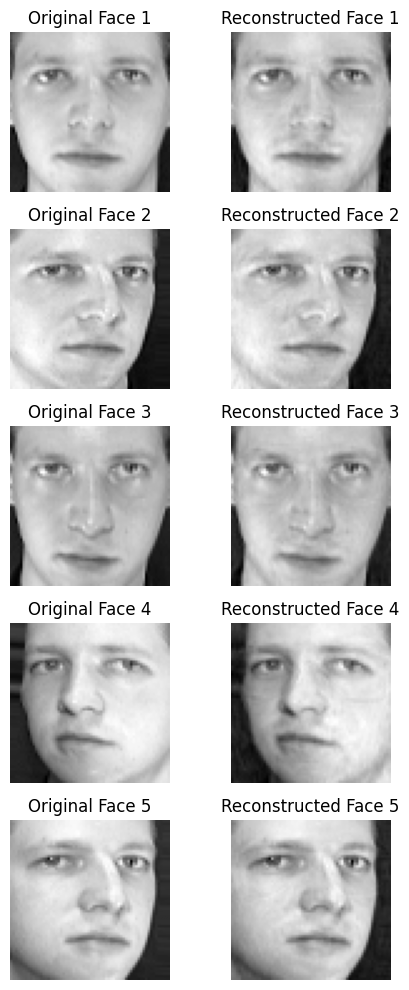

Comment: With 99% variance, the reconstructed faces are much clearer and closer to the originals. Most significant facial features and details are noticeable.


In [53]:
variances = [0.50, 0.75, 0.99]
num_faces_to_plot = 5
selected_faces_indices = np.arange(num_faces_to_plot)
original_faces = x[selected_faces_indices]

for variance in variances:
    print(f"\n--- Retained Variance: {variance*100:.0f}% ---")

    pca = PCA(n_components=variance)
    x_reduced = pca.fit_transform(x)

    num_components_retained = pca.n_components_
    reduction_factor = x.shape[1] / x_reduced.shape[1]
    print(f"Number of principal components retained: {num_components_retained}")
    print(f"Reduction factor: {reduction_factor:.2f}")

    reconstructed_faces = pca.inverse_transform(x_reduced[selected_faces_indices])

    fig, axes = plt.subplots(num_faces_to_plot, 2, figsize=(5, 10))

    for i in range(num_faces_to_plot):
        axes[i, 0].imshow(original_faces[i].reshape(64, 64), cmap='gray')
        axes[i, 0].set_title(f"Original Face {i+1}")
        axes[i, 0].axis('off')

        axes[i, 1].imshow(reconstructed_faces[i].reshape(64, 64), cmap='gray')
        axes[i, 1].set_title(f"Reconstructed Face {i+1}")
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

    if variance == 0.50:
        print("Comment: With 50% variance, many details are lost. Basic facial structure is visible, but features like eyes, nose, and mouth are blurry.")
    elif variance == 0.75:
        print("Comment: With 75% variance, facial features are more defined compared to 50%, but still lack sharpness. Some individual characteristics are starting to appear.")
    elif variance == 0.99:
        print("Comment: With 99% variance, the reconstructed faces are much clearer and closer to the originals. Most significant facial features and details are noticeable.")

Using the data that has been reduced while keeping 95% of the variance, do K-Means Clustering with 80 clusters (the number of faces that are included in the dataset is 40, but the clustering here works better with larger number of clusters).

In [54]:
kmeans = KMeans(n_clusters=80, random_state=42, n_init=10)
kmeans.fit(x_reduced)

KMeans(n_clusters=80, n_init=10, random_state=42)

What are the cluster values for the 5 faces you plotted above?

In [55]:
selected_faces_indices = np.arange(5)
cluster_assignments = kmeans.predict(x_reduced[selected_faces_indices])
print("Cluster assignments for the first 5 faces:", cluster_assignments)

Cluster assignments for the first 5 faces: [21 11 21 12 57]


For each of your 5 faces, plot the other faces that are in the same cluster.


Faces in the same cluster as Face 1 (Cluster 21):


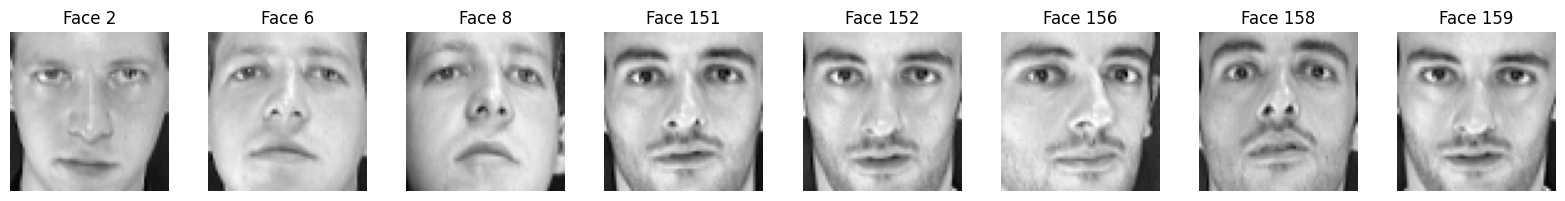


Faces in the same cluster as Face 2 (Cluster 11):


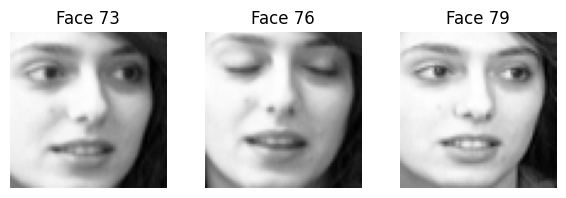


Faces in the same cluster as Face 3 (Cluster 21):


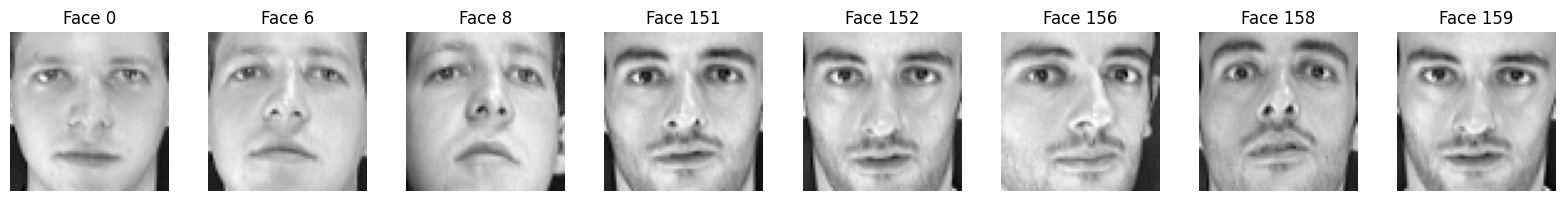


Faces in the same cluster as Face 4 (Cluster 12):


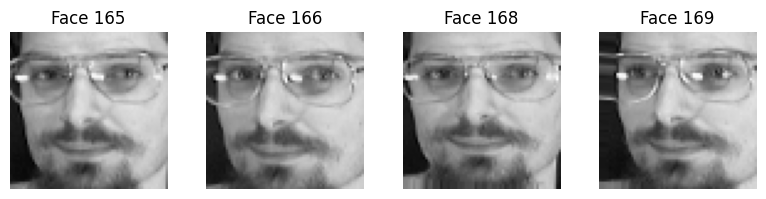


Faces in the same cluster as Face 5 (Cluster 57):


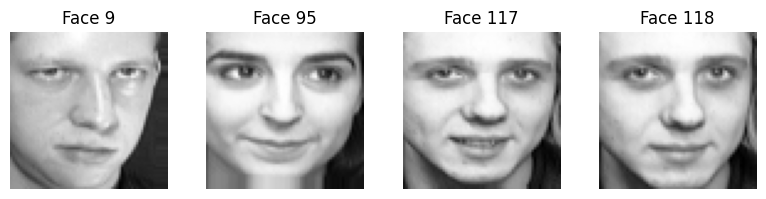

In [56]:
all_cluster_assignments = kmeans.predict(x_reduced)

for i in range(num_faces_to_plot):
    face_index = selected_faces_indices[i]
    assigned_cluster = cluster_assignments[i]

    print(f"\nFaces in the same cluster as Face {i+1} (Cluster {assigned_cluster}):")

    same_cluster_indices = np.where(all_cluster_assignments == assigned_cluster)[0]
    same_cluster_indices = same_cluster_indices[same_cluster_indices != face_index]

    if len(same_cluster_indices) > 0:
        fig, axes = plt.subplots(1, len(same_cluster_indices), figsize=(2 * len(same_cluster_indices), 2))
        if len(same_cluster_indices) == 1:
            axes = [axes]
        for j, idx in enumerate(same_cluster_indices):
            axes[j].imshow(x[idx].reshape(64, 64), cmap='gray')
            axes[j].set_title(f"Face {idx}")
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print("No other faces found in this cluster.")

Do the faces in these clusters look the same or different?



Apart from Face5(Cluster 57) they are the same.


To wrap up, let's consider the following hypothetical scenario:
1. Suppose that the faces in this dataset correspond to a collection of photos you've found on a phone
2. the phone used an algorithm to cluster common faces together as potentially being photos of the same person
3. you take a photo of me in class and the phone tries to match the new picture with one of the clusters it's identified

**First:** make sure that you have downloaded the "Ben1.jpg" file into the same directory as this notebook

**Second:** execute the cell below.  It should output a matplotlib figure of my face.

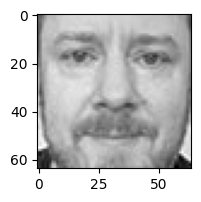

In [57]:
# Execute this to import and look at the new picture of me:

import matplotlib.image as mpimg
from sklearn.preprocessing import MinMaxScaler

im = mpimg.imread('Ben1.jpg')
im = im[:,:,0].reshape(4096,-1).astype('float32')
im = MinMaxScaler().fit_transform(im)

fig = plt.figure(figsize=(2,2))
plt.imshow(im.reshape(64,64),
           cmap='gray')

Identify which cluster my face is closest to and plot the other faces in that cluster.  You'll need to:
* Reshape my face array (stored now as variable `im`) into the proper shape
* Transform it into an array of principal component values
* Use the KMeans predict method on it
* Use the predicted cluster number to identify and plot the other faces in the same cluster

Your face is closest to Cluster 5

Faces in the same cluster as your face (Cluster 5):


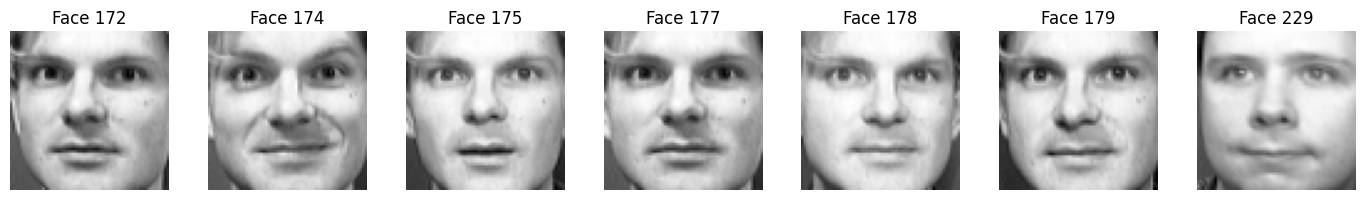

In [58]:
im_reshaped = im.reshape(1, -1)

im_reduced = pca.transform(im_reshaped)

predicted_cluster = kmeans.predict(im_reduced)[0]

print(f"Your face is closest to Cluster {predicted_cluster}")

same_cluster_indices = np.where(all_cluster_assignments == predicted_cluster)[0]

print(f"\nFaces in the same cluster as your face (Cluster {predicted_cluster}):")

if len(same_cluster_indices) > 0:
    # Plot the faces in the same cluster
    fig, axes = plt.subplots(1, len(same_cluster_indices), figsize=(2 * len(same_cluster_indices), 2))
    if len(same_cluster_indices) == 1: # Handle case with only one face in the cluster
        axes = [axes]
    for j, idx in enumerate(same_cluster_indices):
        axes[j].imshow(x[idx].reshape(64, 64), cmap='gray')
        axes[j].set_title(f"Face {idx}")
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No other faces found in this cluster.")

Do I look like the other faces in that cluster?  What do you think the clustering algorithm picked up on to put my face in that cluster?

Not even close, maybe it tried to fit the facial features but it overfit.

## Submit

* Save your work (File -> Save Notebook)
* Verify that your notebook runs without error by restarting the kernel (or closing and opening the notebook) and selecting the top menu item for Run -> Run All Cells.  It should run successfully all the way to the bottom.
* Save your notebook again.  Keep all the output visible when saving the final version.
* Submit the file through the Canvas Assignment.